# Phase V
## Joseph Princiotta & Justin Lusk
#### CYBER 363 Fall 2022

## Part A
### Problem Introduction & Statements

The CIO of Billy's Accounting Inc. approached the cybersecurity data team to explore the use of a machine training algorithm to help filter malicious websites from the companies' network. In the past year Billy's Accounting Inc. network had seen a 40% increase in malicious domains accessed on the network; causing the firewall and network team to become overloaded. The network security team's initial approach to halting malicious websites was done manually, with teammembers having to update the firewall's access control lists each week with newly encountered malicious website data. This process was time consuming and is only reactive, the team could only block malicious websites after they had been discovered. 

The CIO tasked the cyber data team with exploring the automating of discovery and blocking of malicious website data on the companies' networks. If implemented properly this would save thousands of man hours and would provide a proactive solution. This would increase the security of the network and increase the speed of discovering malicious websites.

The cyber data team was given a dataset of recent website data which included 37 categories of website data and an identifier if the website was malicious or not. This dataset was used to test and train a suitable ML algorithm to predict risky websites proactivly. 

### Summary of process 


The first model we decided to try was a Decision Random Forests. We decided to test a random forest model because the use the average of many decision trees to make its prediction, which means they usually perform better than a single decision tree. We tried different values by using cross validation to determine the best values for n_estimators and max_depth by using cross validation. Increasing the amount of estimators increased the accuarcy slightly but also increased the computation time. The vizualization proccess showed that as max_depth was increasing accuracy until it hit max_depth = 7 then accuracy started to decrease.

We decided to use the Support Vector Classifier because it is a discriminativve classifier. Discriminitive classifiers are good at drawing a line between data clusters. Since we are trying to determine whether a email either is or is not a phishing email and having a relatively small amount of data makes it well suited for the prediction we are trying to make. To test the model we used K-Fold cross validation. We chose K-Fold because it tries multiple different training models and combines each round from the different models and the validation results to give us estimate of the models performance. It also helps us determine the best way to spilt our data. To do this we used a GridSearch beacuse it performs an exhaustive search and evaluates its performance. GridSearch gave us the best parameters to use with our model. We then used this data to build the final SVC model and test the metrics.

### Details
final_model = svm.SVC(C=77.8,kernel='rbf')


### Phase 0 & 1 Data Preprocessing and Feature Selection

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Dec 10 19:52:38 2022

@author: jprince
"""

### Phase 0/1 Code.
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

dfTest = pd.read_csv(r"C:\Users\jlusk\OneDrive\Desktop\CYB-362-main (1)\CYB-362-main\Phishing_Legitimate_test_student.csv", na_values=['',' ','n/a'],encoding='utf8')
dfTrain = pd.read_csv(r"C:\Users\jlusk\OneDrive\Desktop\CYB-362-main (1)\CYB-362-main\Phishing_Legitimate_train_missing_data.csv", na_values=['',' ','n/a'],encoding='utf8')

#dfTest = pd.read_csv("Phishing_Legitimate_test_student.csv", na_values=['',' ','n/a'])
#dfTrain = pd.read_csv("Phishing_Legitimate_train_missing_data.csv", na_values=['',' ','n/a'])
################################# Phase 0 and 1 ####################################################
trainRowsWithNa = dfTrain[ dfTrain.isnull().any(axis=1) ]
rowsToDrop = dfTrain[ dfTrain.isnull().sum(axis=1) > 1 ].index
dfTrain.drop(rowsToDrop, inplace=True)
imputer = KNNImputer(n_neighbors=10)
dfTrain2 = pd.DataFrame(imputer.fit_transform(dfTrain),columns = dfTrain.columns)
rows_to_drop=dfTrain2[dfTrain2['UrlLength']>500].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumNumericChars']>100].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumDash']>20].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
clf= LocalOutlierFactor(n_neighbors=20)
X=dfTrain2Numerical.to_numpy()
outlier_label=clf.fit_predict(X)
rows_to_drop= dfTrain2.iloc[clf.negative_outlier_factor_ < -1.30].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
X = dfTrain2Numerical.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
dfTrain2Numerical.is_copy = False
dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X

## Phase 3/4 Code.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])

# Create dataframe of standardized numerical features
dfTrain2Numstd= dfTrain2Numerical[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]

# Created dataframe of all binary data, now binary and standardized numerical features can be seperated IF NEEDED.
dfTrain2Bin= dfTrain2[['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]
# dfTrain2Bin contains binary features and dfTrain2Numstd contains standardized numerical data. 

# Create main dataframe that contains standardized numerical data and binary data
dfTrain3=dfTrain2Bin.join(dfTrain2Numstd)
# Create list of all features
featurecols=dfTrain3.columns.to_list()

# Create seperate lists for numerical & binary features lists
NUMfeaturecols=dfTrain2Numstd.columns.to_list()
BINfeaturecols=dfTrain2Bin.columns.to_list()

####### Dataframe list: ######
# 'dfTrain3' = Main dataframe of training data, std numerical and binary data 
# 'featurecols' = list of all feature cols in 'dfTrain3'
# 'NUMfeaturecols' = list of all numerical features 
# 'BINfeaturecols' = list of all binary features
# 'dfTrain2Bin' = all binary features 
# 'dfTrain2Numstd' = all numerical features standardized

# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])
# Add 'dfClass_labels' to main dfTrain3 
dfTrain3 = dfTrain3.join(dfClass_labels)

C:\Users\jlusk\AppData\Local\Temp\ipykernel_20860\352120760.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X
C:\Users\jlusk\AppData\Local\Temp\ipykernel_20860\352120760.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

#### Feature Selection based on previous phases.

1. 'NumDash_Standardized'
2. 'PathLength_Standardized'
3. 'UrlLength_Standardized'
4. 'PathLevel_Standardized'
5. 'DomainInPaths'
6. 'RandomString'
7. 'InsecureForms'

## Phase V
Two types of ML models were tested, Random Forest classifier and SVM classification.

##### First steps are to build dataframe of final selected features and perform training/testing data split

In [10]:
# make dataframe features only selected features
dfFeatures=dfTrain3[['NumDash_Standardized','PathLength_Standardized','UrlLength_Standardized','PathLevel_Standardized','DomainInPaths','RandomString','InsecureForms']]
Y=dfTrain3['CLASS_LABEL']
X=dfFeatures

### Random Forest algorithm 
A random forests is multiple different decision trees and the average of the predictions from those trees is used to make its prediction. 

#### Random Forests HyperParameter selection
n_esitmators is set to 1000. The higher the n_estimators value, the better the performance and the more stable the predictions. The default of 100 n_estimators gave us an accuracy score of 0.82. n_estimators was increased to 1000 to increase performance. I didnt choose a higher because of the long computation times.
Using K-fold we determined that at max_depth = 7 the model performs the best. The models accuracy increases until it hits 7, after that the accuracy begins to decline due to overfitting.

0.8178491047397702


C:\Users\jlusk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.82254078927157


C:\Users\jlusk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


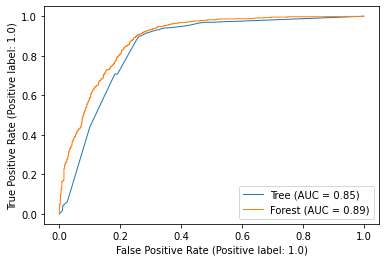

In [11]:
### Fit a std classification tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.50,shuffle=False,random_state=1)
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, Y_train)
 
Y_test_predicted=clf.predict(X_test)
 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
auc=roc_auc_score(Y_test, Y_test_predicted)
print(auc)
fig, ax = plt.subplots()
plot_roc_curve(clf, X_test, Y_test,name='Tree', lw=1, ax=ax)

# Fit a random forest with 100 trees using 400 random training cases for each tree

from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier(n_estimators=1000, max_depth=6,random_state=1, max_samples=400)
rfclf.fit(X_train, Y_train)
 
Y_test_predicted=rfclf.predict(X_test)
 
auc=roc_auc_score(Y_test, Y_test_predicted)
print(auc)
plot_roc_curve(rfclf, X_test, Y_test,name='Forest', lw=1, ax=ax)
 
 
plt.show()

#### Results
The graph shows us the ROC of the decision tree classifier and random forests. forests is the better classifer to use with our model. The forest model performs better because it uses the average prediction of each of its trees to make its prediction. The Tree model usually performs better than any idividual tree of the forest.

### SVM algorithm
SVM's are discriminative classification algorithm. It finds a equation that is able to discriminate data points of the features. It draws a line and one side of the line says it is a phishing email and the other tells us it is not a phishing email.

##### Tuning and selecting the best C value for SVM algorithm on data

large C = smaller error line boundries

Smaller c = larger error line boundries

Smaller C means better generalization

Larger C value = beter performance on the training set

We want our model to be able to generalize better so we will tune the algorithm for the smallest C possible keeping F1 robust. 

##### Model testing for SVM algorithm will use gridseach on kfolds
A gridsearch was used to test through 'c' values and kernel types. 


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END C=0.1, kernel=poly; f1: (test=0.829) precision: (test=0.754) recall: (test=0.919) roc_auc: (test=0.868) total time=   0.4s
[CV 2/10] END C=0.1, kernel=poly; f1: (test=0.824) precision: (test=0.747) recall: (test=0.919) roc_auc: (test=0.833) total time=   0.4s
[CV 3/10] END C=0.1, kernel=poly; f1: (test=0.802) precision: (test=0.760) recall: (test=0.850) roc_auc: (test=0.834) total time=   0.4s
[CV 4/10] END C=0.1, kernel=poly; f1: (test=0.832) precision: (test=0.758) recall: (test=0.923) roc_auc: (test=0.857) total time=   0.4s
[CV 5/10] END C=0.1, kernel=poly; f1: (test=0.836) precision: (test=0.747) recall: (test=0.948) roc_auc: (test=0.856) total time=   0.4s
[CV 6/10] END C=0.1, kernel=poly; f1: (test=0.837) precision: (test=0.772) recall: (test=0.914) roc_auc: (test=0.888) total time=   0.4s
[CV 7/10] END C=0.1, kernel=poly; f1: (test=0.777) precision: (test=0.699) recall: (test=0.876) roc_auc: (test=0.79

<AxesSubplot:xlabel='C', ylabel='f1'>

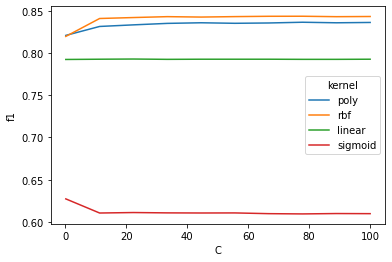

In [12]:
####### Support Vector Classification on testing data #####

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Build a SVM model
Y=Y.to_numpy()
X=X.to_numpy()

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

########## Select best parameters and display the results ######### 

# This section of code will always be the same, only thing that will change will be the type
base_model=SVC()
kernel_values=['poly','rbf','linear','sigmoid']
c_values=np.linspace(0.1,100,10,endpoint=True)
kf=KFold(n_splits=5,shuffle=True)
tuned_parameters=[{'C':c_values,'kernel':kernel_values}]
scores=['precision','recall','f1','roc_auc']

from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(estimator=base_model,
                 param_grid=tuned_parameters,
                 scoring=scores,
                 refit='f1',
                 cv=10,
                 verbose=3)

clf.fit(X,Y) # Look at variabe in 'best_params_' for best 
#'cv_results_' calculations for each fold
print(clf.best_estimator_) #Shows the best estimator & kernel
print(clf.best_params_) # Shows the best parameters, kerel and c-value
print(clf.cv_results_['params'])

# Take the results from (clf.cv_results_['params']) and create a dataframe to store results
df_results=pd.DataFrame(clf.cv_results_['params'])
df_results['f1']=clf.cv_results_['mean_test_f1']
df_results['auc']=clf.cv_results_['mean_test_roc_auc']
df_results['precision']=clf.cv_results_['mean_test_precision']

# Visualize df_results to find best kernel algorithm and c-value
# performance of f1 score
sns.lineplot(data=df_results,x='C',y='f1',hue='kernel')

# Look at precision instead of 'f1'
#sns.lineplot(data=df_results,x='C',y='precision',hue='kernel')

##### Results:
best c = 77.8
best kernel = 'rbf'


#### Fit final model using SVC algorithm with optimized parameters found prior

In [15]:
from sklearn import svm
final_model = svm.SVC(C=77.8,kernel='rbf')
final_model.fit(X, Y)
Y_pre=final_model.predict(X)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

##### Plot Accuracy, Precision, Recall and ROC charrt of final model for training data

In [19]:
print('Accuracy:', accuracy_score(Y, Y_pre))
print('Precision:',precision_score(Y, Y_pre))
print('Recall:', recall_score(Y, Y_pre))

Accuracy: 0.8492678725236865
Precision: 0.7907473309608541
Recall: 0.9520137103684662


##### ROC plot of final model using SVM algorithm with optimized parameters

0.8487341279115058


C:\Users\jlusk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


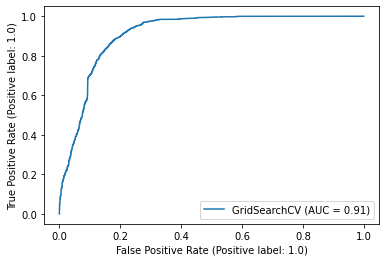

In [21]:
# ROC plot & AUC score of final model
auc_score = roc_auc_score(Y,Y_pre)
print(auc_score)
plot_roc_curve(clf,X,Y)

##### Plot Confusion matrix of final model

Confusion Matrix [[1722  588]
 [ 112 2222]]


C:\Users\jlusk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


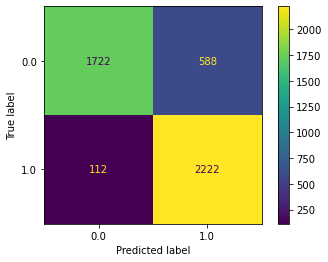

In [17]:
print('Confusion Matrix', confusion_matrix(Y, Y_pre))
plot_confusion_matrix(final_model, X, Y)

## Part B

#### Based on your analyses, describe the most important characteristics of a phishing website
One of the issues with using a non-linear SVC is that it is currently impossible to calculate feature importance. However, we can use our Random Forest Classifier to determine the importance of each feature and rank them.

In [20]:
rfclf=RandomForestClassifier(n_estimators=1000, max_depth=7,random_state=1, max_samples=400)
rfclf.fit(X_train, Y_train)
imps = rfclf.feature_importances_
sort_ind = np.argsort(imps)[::-1]
feature_labels = dfTrain3.columns[1:]
for f in range (X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[sort_ind[f]], imps[sort_ind[f]]))


 1) TildeSymbol                    0.303719
 2) IpAddress                      0.174861
 3) RandomString                   0.168755
 4) NoHttps                        0.165015
 5) DoubleSlashInPath              0.133212
 6) DomainInPaths                  0.029347
 7) DomainInSubdomains             0.025090


#### How would you explain your results to an upper-tier manager to explain your work in this project clearly and briefly? Write a page exclusive summary to describe your work, its importance,  your conclusions, and how your company can benefit from this work.

In our work we created a AI model that differentiate between a normal and phishing emails. By analyzing, testing and processing data on phishing and regular emails we were able to create a model that can differentiate with 85% accuracy. 
The work we did with AI and phishing emails is important for several reasons. AI models have the potential to automate task that can be costly and time consuming. Phishing attacks are one of the most, if not the most common type of threat. A successful phishing attack can have serious detrimental effects on a organization and its employees. Having the ability to automaticallly detect phishing emails can be very benificial.

The company can benifit from our work a several ways. First, is it reduces the number of successful phishing attacks by detecting them automaticallly. Next, is that research in to AI and classification models could potentially be expanded in to other areas. We could potentially build models to detect other threats, or reduce workloads of employeee's. It also removes the stress of an employee having to make the determination themselves. As technology to detect malicious activity becomes more advanced, so does the attack methods. Phishing attacks are becoming more and more convincing.